# PCA Biplot

In this notebook we will cover the complete implementation of a biplot in Python, and use it with a simple example.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import mpl_axes_aligner
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

## Function Implementation

In [2]:
def biplot(dfScores: pd.DataFrame, dfLoadings: pd.DataFrame) -> None:
    
    #create figure and axis objects
    fig,ax = plt.subplots(figsize=(15,8))
    
    #make a scores plot
    ax.scatter(dfScores.PC1.values,dfScores.PC2.values, color='b')
    #set x-axis label
    ax.set_xlabel("PC1",fontsize=10)
    #set y-axis label
    ax.set_ylabel("PC2",fontsize=10)
    
    #create a second set of axes
    ax2 = ax.twinx().twiny()
    
    #setup font dictionary
    font = {'color':  'g',
            'weight': 'bold',
            'size': 12,
            }
    
    #make a loadings plot
    for col in dfLoadings.columns.values:
        #where do our loading vectors end?
        tipx = dfLoadings.loc['PC1',col]
        tipy = dfLoadings.loc['PC2',col]
        #draw the vector, and write label text for col
        ax2.arrow(0, 0, tipx, tipy, color = 'r', alpha = 0.5)
        ax2.text(tipx*1.05, tipy*1.05, col, fontdict = font, ha = 'center', va = 'center')
    
    #align x = 0 of ax and ax2 with the center of figure
    mpl_axes_aligner.align.xaxes(ax, 0, ax2, 0, 0.5)
    #align y = 0 of ax and ax2 with the center of figure
    mpl_axes_aligner.align.yaxes(ax, 0, ax2, 0, 0.5)
    
    #show plot
    plt.show()

## IRIS Example

In [3]:
#load in dataset
dfX,dfY = load_iris(return_X_y=True, as_frame=True)

#standardise the predictors
scaler = StandardScaler()
X = scaler.fit_transform(dfX)

In [4]:
#apply PCA & package results in a dataframe
pca = PCA()
scores = pca.fit_transform(X)
dfScores = pd.DataFrame(scores,columns=['PC'+str(i) for i in range(1,dfX.shape[1]+1)])
dfLoadings = pd.DataFrame(pca.components_,columns=dfX.columns,index=dfScores.columns)

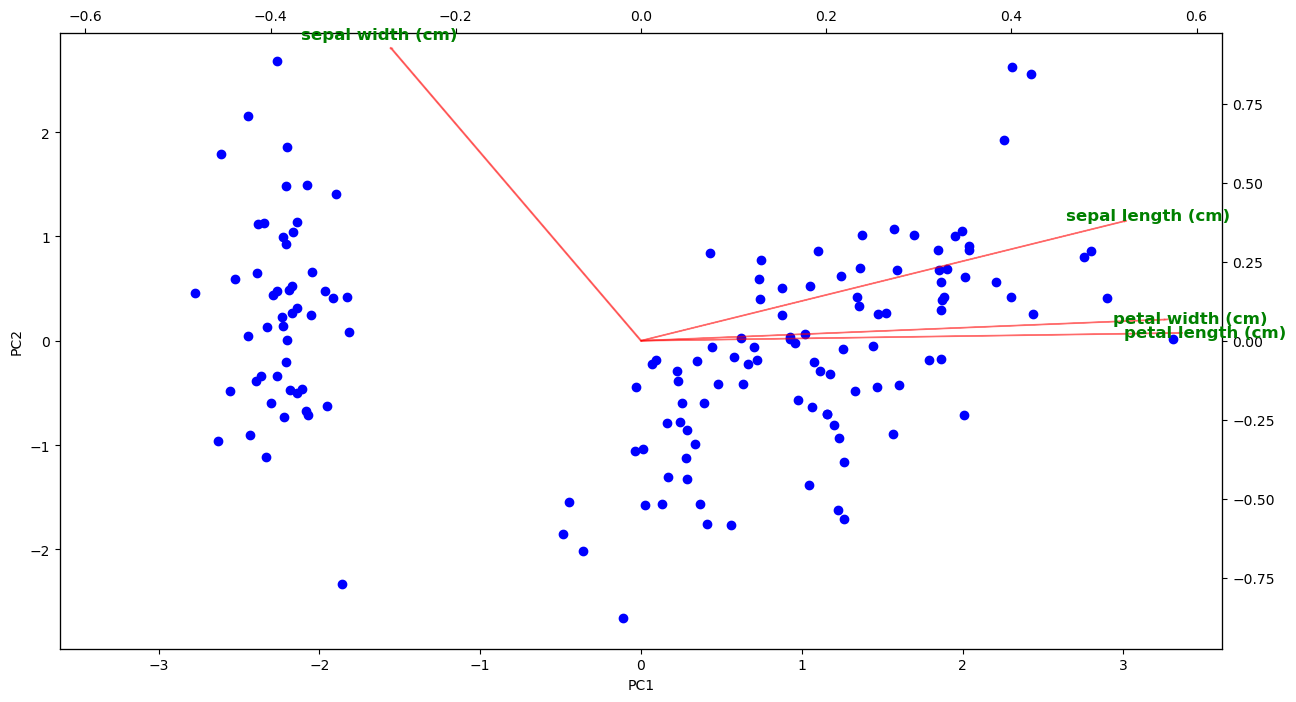

In [5]:
#produce biplot
biplot(dfScores, dfLoadings)

The illustration shows the scores indicated as the blue scatter points on PC1 and PC2, while the loadings are the red vectors labeled with green text. The tick marks on the bottom and left pertain to the scores, while the top and right ticks are for the loadings.

We can see 2 clearly defined clusters in the scoring plots, likely resulting from the different flowers categories. It is possible that the larger cluster to the right is actually composed of 2 clusters itself, which are almost superimposed on one another. This would make sense since this dataset consists of 3 classes of flower.

The loading vectors show that sepal length, petal width, and petal length all primary contribute to PC1 in the positive direction. Sepal width is nearly perpendicular to the other 3 features, and primary contributes to PC2. As such, we would expect sepal length, petal width, and petal length to be highly correlated, while sepal width should be a more distinct feature.